# Standard Normal N(0,1)

Generate a total of 2000 i.i.d. standard normals N(0,1) using each method. Test the normality of the standard normals obtained from each method, using the Anderson-Darling test. Which data set is closer to the normal distribution? (Consult the paper by Stephens - filename 2008 Stephens.pdf on Canvas - to find the appropriate critical points for the Anderson-Darling statistic. Clearly identify those percentiles in your soultion.)

In [43]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

# other imports
import random
import math
import numpy
import matplotlib.pyplot as plt
from scipy.stats import anderson
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

# project imports
import rand
import halton
import bfs
import box_muller
import beasley_springer_moro

### Generate a total of 2000 i.i.d. standard normals N (0, 1) using Box Muller

In [44]:
# generate 1000 2-dim vectors, then flatten to create 2000 standard normals
N = 1000
s = 2
seq = rand.rand_seq
seq = halton.halton_seq
#seq = bfs.bfs_seq

In [45]:
l = box_muller.box_muller_seq(s, N, seq=seq)
# print the first 20
print(l[:10])
# flatten the sequence into 1 dimension
flattened = [item for sublist in l for item in sublist]
nums = flattened
print(nums[:20])

[(-0.40912973196251795, -1.8469692891059952), (0.39682392779532, 0.1251931969485742), (-1.3212494155108478, 0.05745915719645754), (0.31538440830914, -0.6055933024754229), (0.8427544665336392, 1.3233621087066074), (-1.9968498043244582, -1.53278286464337), (1.0225031122577548, -0.4233284889318029), (-0.10378673561283452, 0.7872914029803287), (-1.49816723766047, 0.8358157542441392), (0.002990020573140527, -0.20315969347023646)]
[-0.40912973196251795, -1.8469692891059952, 0.39682392779532, 0.1251931969485742, -1.3212494155108478, 0.05745915719645754, 0.31538440830914, -0.6055933024754229, 0.8427544665336392, 1.3233621087066074, -1.9968498043244582, -1.53278286464337, 1.0225031122577548, -0.4233284889318029, -0.10378673561283452, 0.7872914029803287, -1.49816723766047, 0.8358157542441392, 0.002990020573140527, -0.20315969347023646]


### Sort the sequence

In [46]:
nums = numpy.array(nums)
nums = sorted(nums)

In [47]:
print(nums[:20])

[-3.280263578531568, -3.14653940986959, -3.1448640181857916, -3.139096197968199, -2.8417853920758556, -2.8206640850608755, -2.7017404099481594, -2.6819465928600414, -2.675523547343129, -2.6420119029753404, -2.589676870281118, -2.4994582504730007, -2.4928758382167566, -2.4428685162904595, -2.4361637747031195, -2.430941992847445, -2.417737279235379, -2.4101748857922285, -2.3925196557145285, -2.3417985151931178]


### Compute the sample mean and standard deviation

In [48]:
nums = numpy.array(nums)
mean = numpy.mean(nums)
var = numpy.var(nums)
std = numpy.std(nums)

print('mean = {}'.format(mean))
print('variance = {}'.format(var))
print('standard deviation = {}'.format(std))

mean = 0.00122931016538
variance = 1.00293419299
standard deviation = 1.00146602189


<IPython.core.display.Javascript object>


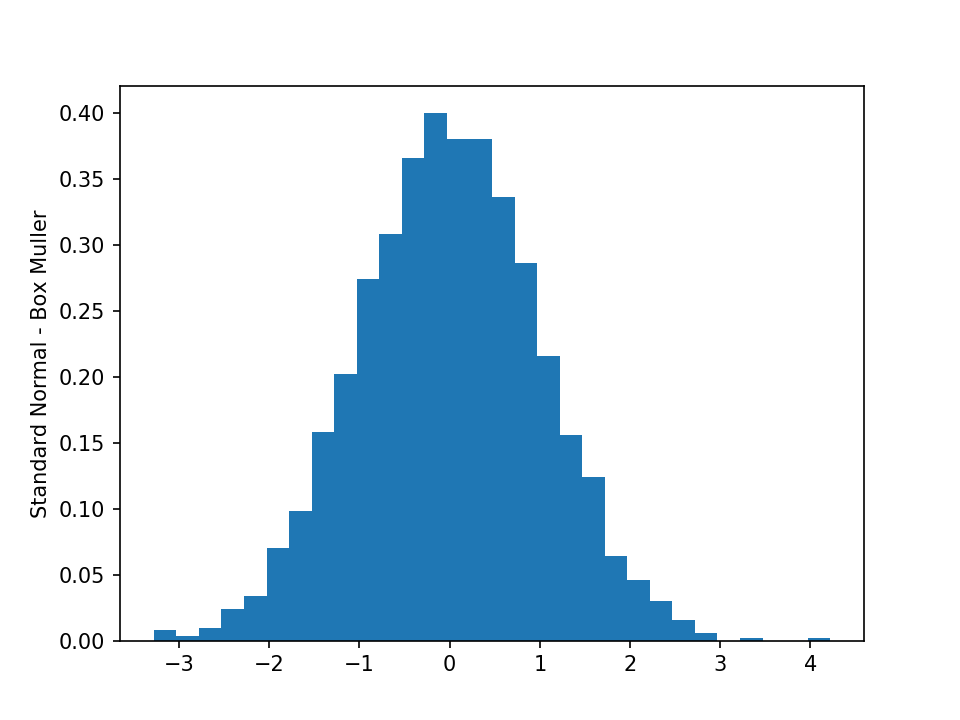

In [49]:
# plot the histogram
plt.hist(nums, normed=True, bins=30)
plt.ylabel('Standard Normal - Box Muller');

### Anderson Darling Test

reference:
https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test#Test_for_normality

reference:
2008 Stephens.pdf pg. 4, "1.3 Modificatons for a test for normality, u, and sigma^2 unknown"

In [50]:
# normality test using scipy.stats
result = anderson(nums)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.043
15.000: 0.575, data looks normal (fail to reject H0)
10.000: 0.655, data looks normal (fail to reject H0)
5.000: 0.785, data looks normal (fail to reject H0)
2.500: 0.916, data looks normal (fail to reject H0)
1.000: 1.090, data looks normal (fail to reject H0)


### Generate a total of 2000 i.i.d. standard normals N (0, 1) using Beasley-Springer-Moro

In [51]:
N=2000
s=1

l = beasley_springer_moro.beasley_springer_moro_seq(s=s, N=N, seq=seq)
# print the first 20
print(l[:20])
# flatten the sequence into 1 dimension
flattened = [item for sublist in l for item in sublist]
nums = flattened
print(nums[:20])

[(0.6348771658969166,), (-0.0319756486422331,), (2.2336132730231215,), (-0.3524624568773145,), (1.0904646206995756,), (0.2851770144341189,), (-1.2146713345184041,), (-0.5251319444581686,), (0.8407133692316111,), (0.12501897199542977,), (-1.6473239864741107,), (-0.1897673131889494,), (1.437737566603055,), (0.45305584460147896,), (-0.9355761274362874,), (-0.6173688384606761,), (0.7339018993673598,), (0.04637855303053045,), (-2.0858581937863168,), (-0.2702193984138246,)]
[0.6348771658969166, -0.0319756486422331, 2.2336132730231215, -0.3524624568773145, 1.0904646206995756, 0.2851770144341189, -1.2146713345184041, -0.5251319444581686, 0.8407133692316111, 0.12501897199542977, -1.6473239864741107, -0.1897673131889494, 1.437737566603055, 0.45305584460147896, -0.9355761274362874, -0.6173688384606761, 0.7339018993673598, 0.04637855303053045, -2.0858581937863168, -0.2702193984138246]


### Sort the sequence

In [52]:
nums = numpy.array(nums)
nums = sorted(nums)

In [53]:
print(nums[:20])

[-3.333159286725374, -3.1156788551577472, -2.9875989389988074, -2.8952683552119276, -2.8225117442518783, -2.7621920130821493, -2.7105075119896807, -2.665185124662835, -2.6247540536612632, -2.5882062251498295, -2.5548196597440023, -2.5240590151440907, -2.495516017243818, -2.468871971991016, -2.4438731952219963, -2.4203143526647626, -2.398026832852362, -2.3768704286170546, -2.3567272558271437, -2.33749722261828]


### Compute the sample mean and standard deviation

In [54]:
nums = numpy.array(nums)
mean = numpy.mean(nums)
var = numpy.var(nums)
std = numpy.std(nums)

print('mean = {}'.format(mean))
print('variance = {}'.format(var))
print('standard deviation = {}'.format(std))

mean = 0.00128515874421
variance = 1.00138770623
standard deviation = 1.00069361257


<IPython.core.display.Javascript object>


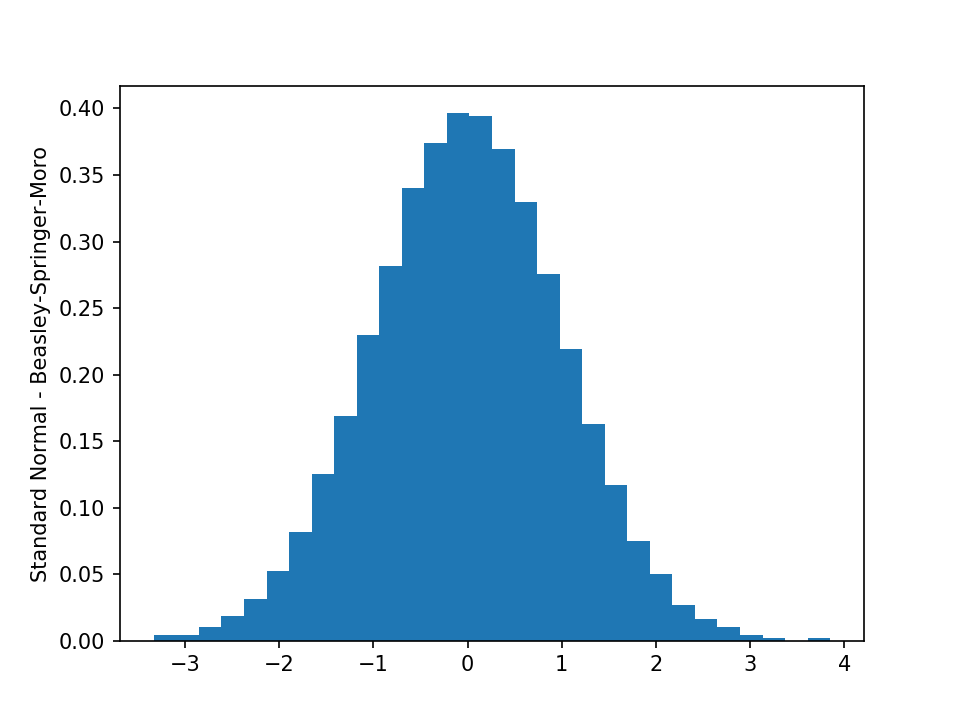

In [55]:
# plot the histogram
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(nums, normed=True, bins=30)
ax.set_ylabel('Standard Normal - Beasley-Springer-Moro');

In [56]:
# normality test using scipy.stats
result = anderson(nums)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.003
15.000: 0.575, data looks normal (fail to reject H0)
10.000: 0.655, data looks normal (fail to reject H0)
5.000: 0.785, data looks normal (fail to reject H0)
2.500: 0.916, data looks normal (fail to reject H0)
1.000: 1.090, data looks normal (fail to reject H0)
